# Stop and search in the West Midlands

Work through the notebook from beginning to the end.

Execute any cells that you are given, and fill in the ones that you need to
fill in.

You will see the marks for each question in the comments.

There are OKpy cells for you to run for many of the questions.  **If the OKpy
cells pass, it doesn't mean you have the marks for that question, it only
means you are on the right track**.

To start, execute the cells below, that:

* get the array library Numpy, and
* get the standard libraries and settings for plots and
* get the [Pandas](https://pandas.pydata.org/) library for data tables (data
  frames), and
* set up the OKpy tests.

In [1]:
# Don't change this cell; just run it.

# Load the standard array library
import numpy as np

# Load the plotting package
import matplotlib.pyplot as plt

# Tell plotting package to show plots in the notebook
%matplotlib inline

# Make plots a little more fancy.
plt.style.use('fivethirtyeight')

# Load the Pandas library
import pandas as pd

# The OKpy testing system.
from client.api.notebook import Notebook
ok = Notebook('hw02.ok')

Assignment: Homework 2: stop and search
OK, version v1.14.15



## Ethnicity in the West Midlands

We wonder whether the West Midlands police force is, for whatever reason, more
likely to stop and search not-white people than white people.   To work out
whether this is true, we first have to consider the proportions of white and
not-white people in the population.  If 80% of the people that the police stop
are black, that sounds like bias, unless 80% of the population are black, in
which case they may be treating everyone equally.

We need to compare the percentages of the different ethnicities in the West Midlands with the ethnicities of those stopped and searched.

Our first task is therefore to find the proportions of each race / ethnicity in the West midlands.

### Ethnicity data

The government publishes
[statistics](https://www.ethnicity-facts-figures.service.gov.uk/british-population/national-and-regional-populations/regional-ethnic-diversity/latest)
on the percentages of each ethnic group in the regions of England and Wales.

Here you are reading the [source data for Areas of England and Wales by
ethnicity](https://www.ethnicity-facts-figures.service.gov.uk/british-population/national-and-regional-populations/regional-ethnic-diversity/latest/downloads/areas-of-england-and-wales-by-ethnicity.csv).

I downloaded the file `areas-of-england-and-wales-by-ethnicity.csv` from the
link above.

In what follows, make sure you have this file in the same directory as this
notebook.  You should have got the file with the zip archive.

Execute the following cell to load the data as a Pandas data frame, and then
display it.

In [2]:
# Don't change this cell; just run it

# Load the data from a file in the same directory as the notebook.
regions_by_eth = pd.read_csv('areas-of-england-and-wales-by-ethnicity.csv')

# Show the first five rows of the data frame in the notebook.
regions_by_eth.head()

,Standard Ethnicity,Region,%
0,Asian,East,4.8
1,Asian,East Midlands,6.5
2,Asian,London,18.5
3,Asian,North East,2.9
4,Asian,North West,6.2


Now your turn.  First get the "Region" column of the data frame into its own
variable.  A bit further down, you are going to use this to select the "West
Midlands" rows from this data frame.

In [3]:
#- Put the "Region" column of the data frame into a new variable "regions".
#- 2 marks / 100 (total 2 so far)
regions = regions_by_eth['Region']
# Show the value of regions
regions

0                         East
1                East Midlands
2                       London
3                   North East
4                   North West
5                   South East
6                   South West
7                        Wales
8                West Midlands
9     Yorkshire and The Humber
10                        East
11               East Midlands
12                      London
13                  North East
14                  North West
15                  South East
16                  South West
17                       Wales
18               West Midlands
19    Yorkshire and The Humber
20                        East
21               East Midlands
22                      London
23                  North East
24                  North West
25                  South East
26                  South West
27                       Wales
28               West Midlands
29    Yorkshire and The Humber
30                        East
31               East Midlands
32      

Here is an OKpy test, to see if you are on the right track. Remember - these
tests only check whether you are on the right track. If the test passes, it
does not mean you have full marks for the question.

In [4]:
# Check answer is on right track.
_ = ok.grade('q_1_regions')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



Make a variable `is_wm` that is a Boolean Series with `True` in the elements
corresponding to the "West Midlands" and `False` otherwise.

In [5]:
#- 3 marks / 100 (total 5 so far)
is_wm = regions == 'West Midlands'
# Show first five values of is_wm
is_wm.head()

0    False
1    False
2    False
3    False
4    False
Name: Region, dtype: bool

In [6]:
# Check answer is on right track.
_ = ok.grade('q_2_is_wm')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



Make a new data frame `wm_by_eth` that only contains the rows from
`regions_by_eth` that correspond to the West Midlands.

In [7]:
#- 5 marks / 100 (total 10 so far)
wm_by_eth = regions_by_eth[is_wm]
# Display values of wm_by_eth
wm_by_eth

,Standard Ethnicity,Region,%
8,Asian,West Midlands,10.8
18,Black,West Midlands,3.3
28,Mixed,West Midlands,2.4
38,White British,West Midlands,79.2
48,White other,West Midlands,3.6
58,Other,West Midlands,0.9


In [8]:
# Check answer is on right track.
_ = ok.grade('q_3_wm_by_eth')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



`wm_by_eth` has percentages of the population, for each ethnicity.  For
example, you should see above that the "White British" ethnicity is the
ethnicity claimed by nearly 80% of the population of the West Midlands.

Now you are building up to making a horizontal bar plot of the different
ethnicities in the West Midlands.  Start by sorting the data frame, with the
most common ethnicity first.

Remember, the name of the percent column is `"%"` (the percent sign).

In [9]:
#- Make a new data frame "wm_sorted" by sorting "wm_by_eth"
#- by the "%" column.  Largest values should come first.
#- 5 marks / 100 (total 15 so far)
wm_sorted = wm_by_eth.sort_values(['%'], ascending=False)
# Display the values of wm_sorted
wm_sorted

,Standard Ethnicity,Region,%
38,White British,West Midlands,79.2
8,Asian,West Midlands,10.8
48,White other,West Midlands,3.6
18,Black,West Midlands,3.3
28,Mixed,West Midlands,2.4
58,Other,West Midlands,0.9


In [10]:
# Check answer is on right track.
_ = ok.grade('q_4_wm_sorted')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



Your job is now to display a horizontal bar plot of the percents for each
ethnicity.  When you have done this right, you should see the ethnicities
listed on the left of the vertical axis, with the least common ethnicity first.
The horizontal axis corresponds to percent.  You should see coloured bars going
from left to right, with the longest bar at the bottom, corresponding the
percentage of "White British".

*Hint* Use tab completion to investigate the methods contained in
`wm_sorted.plot` for a plausible plot type to try.

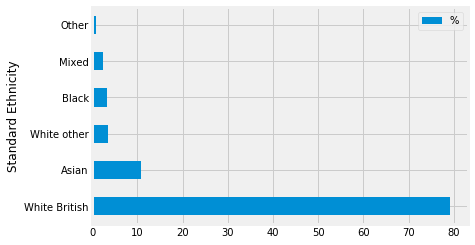

In [11]:
#- 5 marks / 100 (total 20 so far)
wm_sorted.plot.barh('Standard Ethnicity')

This is a little more difficult.   In the next section of this assignment,
you are going to use the value for the percentage of the West Midlands
population that is "White British".  It is useful to fetch that number and
store it in a variable.

Try doing that in the next cell.  Run the OKpy test to see if you've got the right answer.

In [12]:
#- Put the West Midlands percentage of "White British" into a new variable
#- "wb_pct".  You will probably need more than one line of code.
#- 5 marks / 100 (total 25 so far)
ethnicity = wm_by_eth['Standard Ethnicity']
is_wb = ethnicity == 'White British'
just_wb = wm_by_eth[is_wb]
wb_pct = just_wb['%']
# Display the value as a floating point number
float(wb_pct)

# In this case, as the Data Frame is not very long and we actually know the row corresponding to "White British" (row 38)
# in the West Midlands, we could also use:
        # wb_pct = wm_by_eth.at[38, '%']
        # wb_pct

79.2

In [13]:
_ = ok.grade('q_6_wb_pct')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



## Stop and search

Now we analyze the stop and search data.  We will compare the stop and search
data to the ethnicity proportions we found above.

The UK police publish various statistics about their work at
<https://data.police.uk/data>.

I went to this site, selected "September 2019" as the start and end of the
"Date range", selected "West Midlands" in the "Forces" panel, unselected
"include crime data" and "include outcomes data", and selected "include stop
and search data".  Then I downloaded and unpacked the generated zip file, to
give the file `2019-09-west-midlands-stop-and-search.csv`.

You should make sure you have this file in the same directory as the notebook.   You should have got the file with the zip archive.

These are records of all the stop and search incidents by members of the West
Midlands police force during September 2019.

First load this file as a data frame.  You might want to look at the previous
part of the assignment for inspiration.

In [14]:
#- Use "pd.read_csv" to load
#- "2019-09-west-midlands-stop-and-search.csv" as a data frame;
#- Put the new data frame into a variable "stop_search".
#- 2 marks / 100 (total 27 so far)
stop_search = pd.read_csv('2019-09-west-midlands-stop-and-search.csv')
# Display first five rows of the data frame
stop_search.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2019-08-31T23:05:00+00:00,NaN,NaN,52.615526,-1.928901,NaN,10-17,White - English/Welsh/Scottish/Northern Irish/...,NaN,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
1,Person search,2019-08-31T23:15:00+00:00,NaN,NaN,52.622678,-1.938063,NaN,10-17,White - English/Welsh/Scottish/Northern Irish/...,NaN,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
2,Person search,2019-08-31T23:28:00+00:00,NaN,NaN,52.439548,-1.967960,NaN,NaN,White - English/Welsh/Scottish/Northern Irish/...,NaN,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,NaN,False
3,Person search,2019-08-31T23:41:00+00:00,NaN,NaN,52.477214,-1.911043,NaN,NaN,Other ethnic group - Not stated,NaN,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False
4,Person search,2019-08-31T23:41:00+00:00,NaN,NaN,52.477214,-1.911043,NaN,10-17,White - English/Welsh/Scottish/Northern Irish/...,NaN,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False


In [15]:
_ = ok.grade('q_7_stop_search')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



We are particularly interested in two columns - `Self-defined ethnicity` and
`Outcome`.

We need to compare the percentages of the different ethnicities in the West Midlands with the ethnicities of those stopped and searched.

We are about to see that is a problem, because the categories in this table are not quite the same as the categories in the demographic data you analyzed in the previous section.

In [16]:
#- Make a new variable "ethnicity" that has the values from
#- the "Self-defined ethnicity" column of "stop_search".
#- 2 marks / 100 (total 29 so far)
ethnicity = stop_search['Self-defined ethnicity']
# Display the first five values of ethnicity
ethnicity.head()

0    White - English/Welsh/Scottish/Northern Irish/...
1    White - English/Welsh/Scottish/Northern Irish/...
2    White - English/Welsh/Scottish/Northern Irish/...
3                      Other ethnic group - Not stated
4    White - English/Welsh/Scottish/Northern Irish/...
Name: Self-defined ethnicity, dtype: object

In [17]:
# Check you are on the right track.
_ = ok.grade('q_8_ethnicity')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



If you run the cell below, you should see that `ethnicity` is a Pandas
`Series` type.  That is the type Pandas uses to contain columns of data.

In [18]:
type(ethnicity)

pandas.core.series.Series

The `ethnicity` series has the recorded ethnicities for each person who
suffered a stop and search.  We would like to see all the different
ethnicities, with a count of how many times they appear.

Use the `value_counts` method of `ethnicity` to store the unique values in
`ethnicity`, along with the number of times these values occur.  Put the results into the variable `eth_counts`.

In [19]:
#- 3 marks / 100 (total 32 so far)
eth_counts = ethnicity.value_counts()
# Show the values
eth_counts

White - English/Welsh/Scottish/Northern Irish/British                                   680
Asian/Asian British - Pakistani                                                         332
Black/African/Caribbean/Black British - Caribbean                                       153
Asian/Asian British - Indian                                                            109
White - Any other White background                                                      108
Other ethnic group - Not stated                                                         106
Mixed/Multiple ethnic groups - White and Black Caribbean                                 85
Black/African/Caribbean/Black British - African                                          84
Asian/Asian British - Any other Asian background                                         80
Black/African/Caribbean/Black British - Any other Black/African/Caribbean background     40
Asian/Asian British - Bangladeshi                                               

In [20]:
# Check you are on the right track.
_ = ok.grade('q_9_eth_counts')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



Compare these ethnicity labels to the ones in the previous section.  They do
not correspond exactly.  We need to recode the ethnicities recorded in this
column to match those in the previous section.

To do this, we can use a recoding function.  That is a little more advanced
than the course so far, so next few cells do the recoding for you.

First I write my own function, that takes a single argument `value`.  `value`
will be a single ethnicity from the `ethnicity` series above.  It returns my
best guess at the corresponding ethnicity from the demographics data in the
previous section.  For example, I guess that both of the  "White - English
..." and "White - Irish" ethnicities in the series correspond to the "White
British" category in the demographics table from the previous section.

Do not worry about the details of this function, just run the cell below to
define it.

In [21]:
# A function to recode ethnicity.
# Run this cell to define the function.
def recode_eth(value):
    """ Recode ethnicity values to match standard

    Accept ethnicity string as used in "Self-defined ethnicity".
    Return matching ethnicity used by the government statistics
    on ethnicity.
    """
    if pd.isna(value):  # Missing value
        return np.nan
    if value.startswith('Asian'):
        return 'Asian'
    if value.startswith('Mixed'):
        return 'Mixed'
    if value.startswith('Black'):
        return 'Black'
    if value.startswith('White - English'):
        return 'White British'
    if value.startswith('White - Irish'):
        return 'White British'
    if value.startswith('White - Any other'):
        return 'White other'
    if value.startswith('Other ethnic group'):
        return 'Other'
    # If we didn't already return something, stop here
    # with an error.
    raise ValueError('Did not expect ethnicity ' + value)

The next couple of cells are just to show how the encoding function works. I
call the function on a couple of the values that appear in the `ethnicity`
series from the stop and search data.

In [22]:
# Run this cell.
# Show example of the recoding function in action
recode_eth('Asian/Asian British - Indian')

'Asian'

In [23]:
# Run this cell.
# Another example
recode_eth('White - Irish')

'White British'

Last in this recoding sequence of cells, run this cell to "apply" the
`recode_eth` function above to all the values in the `ethnicity` series in
turn.  This returns a new series of the same length as `ethnicity`, but with
the recoded values.

In [24]:
# Run this cell to use the "apply" method of "ethnicity",
# and the "recode_eth" function above, to make a new variable
# "recoded_eth".  This has the ethnicity values recoded to the
# form used in the UK government demographics.
recoded_eth = ethnicity.apply(recode_eth)
# Display the first give values of "recoded_eth"
recoded_eth.head()

0    White British
1    White British
2    White British
3            Other
4    White British
Name: Self-defined ethnicity, dtype: object

If you have run the cells above, you now have a new series called `recoded_eth`, with the recoded ethnicity values for each stop and search incident.

Just to check, calculate the unique values in this new series, and the number
of times each value appears.

In [25]:
#- Make a new variable "recoded_eth_counts" that has the unique values of
#- "recoded_eth", and their counts.
#- 2 marks / 100 (total 34 so far)
recoded_eth_counts = recoded_eth.value_counts()
# Show the values of "recoded_eth_counts"
recoded_eth_counts

White British    692
Asian            554
Black            277
Mixed            149
White other      108
Other            106
Name: Self-defined ethnicity, dtype: int64

In [26]:
# Check you are on the right track.
_ = ok.grade('q_10_recoded_eth_counts')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



The counts in `recoded_eth_counts` are the total number of people from each
ethnicity that were stopped and searched by the West Midlands police.  We want
to compare these counts, by eye, using a horizontal bar graph.

If you get the graph right, you should see the recoded ethnicities listed to
the left of the vertical axis. The horizontal axis corresponds to the counts
for every ethnicity.  You should see the more common ethnicities (ethnicities
with higher counts) appear at the bottom.

Be careful - here you are about to use one of the `plot.` methods of the
`recoded_eth_counts` *series*.  In the earlier section, you may have used a
`plot.` method of a *data frame*.   These are not quite the same.  For example,
in a data frame, we have to tell the method which columns to use for the plot.
For the series, there is only one column, so the method will not need the same
information.  You can check what information the method needs by making a new
cell and running `recoded_eth_counts.plot.eg_method?` to show the help for your
method (replace `eg_method` by the name of the method you are using).

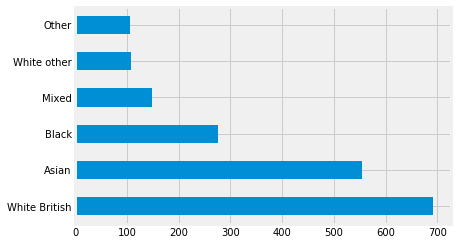

In [27]:
#- Use a "plot." method of "recoded_eth_counts" to show a
#- horizontal bar chart of the counts for each ethnicity.
#- The ethnicity should display on the vertical axis
#- and the count on the horizontal axis.
#- 3 marks / 100 (total 37 so far)
recoded_eth_counts.plot.barh()

We need to pay attention to missing values. A few cells above, you display the
contents of the `recoded_eth` series.  You may have noticed that some of the
values are `NaN` or Not A Number.  This is a stop and search for which the
police officer did not record a "Self-defined ethnicity".

That is going to be a problem for us later on, because we can only analyze the
stop and search incidents for the ethnicities that were recorded.

First we need to check how many of values in `recoded_eth` are valid - that is, how many values there are that are not `NaN`.  We can get this by using the `count` method of the series, to return the count of not-NaN values.

In [28]:
#- Make a new variable "n_valid_eth" that has the total number of recoded
#- ethnicity values that are not missing (NaN).
#- 3 marks / 100 (total 40 so far)
n_valid_eth = recoded_eth.count()
# Show the value of "n_valid_eth"
n_valid_eth

1886

In [29]:
# Check you are on the right track.
_ = ok.grade('q_12_valid_eth')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



## Testing for racial bias in stop and search

Now we want to work out whether the number of "White - British" people who
were stopped and searched is compatible with the following model:

**Model**: *Any person in the West Midlands has an equal chance of being
stopped and searched, regardless of their ethnicity.*

As we saw from the analysis of government ethnicity data, 79.2 percent of the
West Midlands population is "White British".

Therefore, our model says that every person who is stopped and searched has a
79\.2 percent chance of being "White British".

Is that model compatible with the data that we actually see?

In the next few cells, you do a simulation to find out.

As for the other simulations we have done, we start with some random numbers.
We will use these to simulate whether the person stopped is "White British" or
not.  We will simulate 10000 months of stop and search incidents, where each month has `n_valid_eth` incidents.

We start by simulating one month.

You need `n_valid_eth` *random incidents* for one month.

A random incident is a stop and search incident that has a 79.2 percent chance
of being True (for White British person stopped), and a 20.8 percent chance of
being False (for non-White British person stopped).

Here is the result of a simulation for a single month.  Notice we us `np.random.uniform` to give us `n_valid_eth` random numbers between 0 and 1, and we use those to get a 0.792 chance of a True value.

In [30]:
# Simulation of a single month of stop-search incidents
randoms = np.random.uniform(0, 1, n_valid_eth)
wb_incidents = np.count_nonzero(randoms < 0.792)
wb_incidents

1513

Now for your simulation.  Use this simulation for one month to do simulations for 10000 months.  Store the results of the `wb_incidents` count for each of these 10000 months in an array called `white_counts`.

In [31]:
#- 8 marks / 100 (total 48 so far)
white_counts = np.zeros(10000)
for i in np.arange(10000):
    randoms = np.random.uniform(0, 1, n_valid_eth)
    wb_incidents = np.count_nonzero(randoms < 0.792)
    white_counts[i] = wb_incidents
# Show the first five counts in white_counts
white_counts[:5]

array([1536., 1514., 1507., 1487., 1497.])

In [32]:
# Check you are on the right track.
_ = ok.grade('q_13_white_counts')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 5
    Failed: 0
[ooooooooook] 100.0% passed



You now have an array with 10000 values, where each value is the number of White British people in one simulation.

Plot a histogram of this array to show the spread of these counts. Our
simulation means that these counts have come about by random sampling.

Check your other notebooks for inspiration on the function to call, to plot a histogram.

(array([  20.,  105.,  579., 1695., 2963., 2744., 1448.,  397.,   43.,
           6.]),
 array([1426., 1440., 1454., 1468., 1482., 1496., 1510., 1524., 1538.,
        1552., 1566.]),
 <a list of 10 Patch objects>)

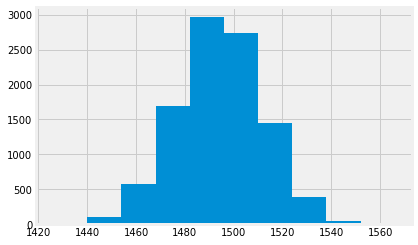

In [33]:
#- Show a histogram of the counts in the "white_count" array.
#- 2 marks / 100 (total 50 so far)
plt.hist(white_counts)

Looking at this histogram, how likely is it, that the count we observed above
for the number of "White British" people stopped, could have come about under
the assumptions of our model?

Assign either 1, 2, 3, 4, or 5 to the name `likely_no_bias` below.

1. Reasonably likely.
2. Fairly unlikely, but not unlikely enough to be surprising.
3. Unlikely, but we still cannot be confident the model is incorrect.
4. Highly unlikely, we have strong evidence the model is incorrect.
5. The observed result is impossible given the model assuming no difference.

In [34]:
#- 5 marks / 100 (total 55 so far)
likely_no_bias = 5

The next cell checks that your answer above is in the correct format. This
test *does not* check that you answered correctly; only that you assigned a
number successfully in the multiple-choice answer cell.

In [35]:
_ = ok.grade('q_14_1_no_bias')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



## Are arrests biased?

We are suspicious that the police may be more likely to stop a not-white person, but, if they do stop them, are they more likely to arrest them?  Do white people get off with a caution or no action more often than people who are not white?

The `stop_search` data frame also has a column `Outcome` that gives
information on what happened after the stop and search.

Make a new variable `outcomes` that has the values from the "Outcome" column
of `stop_search`.

In [36]:
#- 2 marks / 100 (total 57 so far)
outcomes = stop_search['Outcome']
# Show the first five values in outcomes
outcomes.head()

0    A no further action disposal
1    A no further action disposal
2    A no further action disposal
3    A no further action disposal
4    A no further action disposal
Name: Outcome, dtype: object

In [37]:
# Check you are on the right track.
_ = ok.grade('q_15_outcomes')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



As before, it is useful to have a look at the unique values in `outcomes`, and
the counts of the number of times each value appears.

Calculate and store the unique values and counts for outcomes in the variable
`outcomes_counts`.

In [38]:
#- 2 marks / 100 (total 59 so far)
outcomes_counts = outcomes.value_counts()
# Show the first five values in outcomes_counts
outcomes_counts.head()

A no further action disposal    1443
Arrest                           257
Khat or Cannabis warning          94
Penalty Notice for Disorder       24
Community resolution              22
Name: Outcome, dtype: int64

In [39]:
# Check you are on the right track.
_ = ok.grade('q_16_outcomes_counts')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



We want to find which of these outcomes correspond to a White British person, and which do not.  To do this, we need to look again at the `recoded_eth` series we calculated above.

Make a Boolean series `is_white` that has True in positions corresponding to "White British" in `recoded_eth` and False otherwise.

In [40]:
#- 2 marks / 100 (total 61 so far)
is_white = recoded_eth == 'White British'
# Show the first five values of is_white
is_white.head()

0     True
1     True
2     True
3    False
4     True
Name: Self-defined ethnicity, dtype: bool

In [41]:
# Check you are on the right track.
_ = ok.grade('q_17_is_white')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



Calculate the number of "White British" elements in `recoded_eth`.  Store in the variable `n_white`.

In [42]:
#- 2 marks / 100 (total 63 so far)
n_white = np.count_nonzero(is_white)
n_white

692

In [43]:
# Check you are on the right track.
_ = ok.grade('q_18_n_white')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



Select the values in `outcomes` that correspond to "White British" in `recoded_eth`.  Store in the variable `white_outcomes`.

In [44]:
#- Make a new variable "white_outcomes" that has the result of
#- selecting "outcomes" values that correspond to White British people who
#- were stopped and searched.
#- 2 marks / 100 (total 65 so far)
white_outcomes = outcomes[is_white]
white_outcomes.head()

0    A no further action disposal
1    A no further action disposal
2    A no further action disposal
4    A no further action disposal
5    A no further action disposal
Name: Outcome, dtype: object

In [45]:
# Check you are on the right track.
_ = ok.grade('q_19_white_outcomes')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



We have previously seen the breakdown of unique outcomes, and counts of these
outcomes, for the whole `outcomes` series.  Now do the same to show the unique
values, and their counts, for the `white_outcomes` series.

In [46]:
#- Calculate the unique values and counts of the different outcomes, for
#- White British people who were stopped and searched.
#- 2 marks / 100 (total 67 so far)
white_outcomes_counts = white_outcomes.value_counts()
white_outcomes_counts

A no further action disposal    498
Arrest                           97
Khat or Cannabis warning         36
Community resolution              8
Penalty Notice for Disorder       6
Summons / charged by post         2
Name: Outcome, dtype: int64

In [47]:
# Check you are on the right track.
_ = ok.grade('q_20_white_outcomes_counts')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



Calculate the proportion of stopped White British people that were arrested.  Don't write in the numbers you've found above, use code to calculate the number of White British people who were arrested, and the total number of White British People with valid outcomes.

*Hint 1* - remember that some values will be missing.

*Hint 2* - one option is to calculate a new Boolean Series on the way to your solution.

In [48]:
#- 5 marks / 100 (total 72 so far)
white_arrested = white_outcomes == 'Arrest'

white_arrested_p = sum(white_arrested) / len(white_outcomes)
white_arrested_p

0.14017341040462428

In [49]:
# Check you are on the right track.
_ = ok.grade('q_20_1_white_arrested_p')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



We know the frequencies of different outcomes for White British people; we
would like to calculate the same information for not-white people.

First we need a Series that has `True` at positions corresponding to not-white
people in `recoded_eth`, and `False` otherwise.

In [50]:
#- 3 marks / 100 (total 75 so far)
is_not_white = recoded_eth != 'White British'
# Show the first five values of is_not_white
is_not_white.head()

0    False
1    False
2    False
3     True
4    False
Name: Self-defined ethnicity, dtype: bool

In [51]:
# Check you are on the right track.
_ = ok.grade('q_21_is_not_white')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



Next, we select the outcomes corresponding to the not-white people.

In [52]:
#- 2 marks / 100 (total 77 so far)
not_white_outcomes = outcomes[is_not_white]
not_white_outcomes.head()

3     A no further action disposal
9     A no further action disposal
10                          Arrest
11    A no further action disposal
12    A no further action disposal
Name: Outcome, dtype: object

In [53]:
# Check you are on the right track.
_ = ok.grade('q_22_not_white_outcomes')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



Show the corresponding unique values and their counts for the outcomes
corresponding to the not-white people.

In [54]:
#- 2 marks / 100 (total 79 so far)
not_white_outcomes_counts = not_white_outcomes.value_counts()
not_white_outcomes_counts

A no further action disposal       945
Arrest                             160
Khat or Cannabis warning            58
Penalty Notice for Disorder         18
Community resolution                14
Caution (simple or conditional)      4
Summons / charged by post            2
Name: Outcome, dtype: int64

In [55]:
# Check you are on the right track.
_ = ok.grade('q_23_not_white_outcomes_counts')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



Calculate the proportion of not-white people who were arrested after they were
stopped.

In [56]:
#- 3 marks / 100 (total 82 so far)
not_white_arrested = not_white_outcomes == 'Arrest'

not_white_arrested_p = sum(not_white_arrested) / len(not_white_outcomes)
not_white_arrested_p

0.12241775057383321

In [57]:
# Check you are on the right track.
_ = ok.grade('q_23_1_not_white_arrested_p')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



Now we will try and work out whether there is likely to be a difference between the arrest / don't arrest decision for White British people compared to not-White British people.

One index of difference is the difference we observe in the probability of being arrested.

In [58]:
p_diff = white_arrested_p - not_white_arrested_p
p_diff

0.017755659830791068

Now we need to formulate a model of these data where there is no difference in the likelihood of arrest for the White / not-White groups.

We first need to calculate the number of White British and not-White British people who have valid outcomes recorded.

The next cell makes a new data frame that has only the valid (not-missing) observations of `recoded_eth` and `outcomes`.  Don't worry about the details, just execute this cell.

In [59]:
# Just run this cell.
eth_outcome = pd.DataFrame()
eth_outcome["ethnicity"] = recoded_eth
eth_outcome["outcome"] = outcomes
# Drop any missing values in either column
eth_outcome = eth_outcome.dropna()
eth_outcome.head()

,ethnicity,outcome
0,White British,A no further action disposal
1,White British,A no further action disposal
2,White British,A no further action disposal
3,Other,A no further action disposal
4,White British,A no further action disposal


The number of White British people in this table:

In [60]:
n_wb = np.count_nonzero(eth_outcome['ethnicity'] == 'White British')
n_wb

647

The number of not-White British people in this table:

In [61]:
n_nwb = np.count_nonzero(eth_outcome['ethnicity'] != 'White British')
n_nwb

1102

The total number of arrests from this table:

In [62]:
n_arrests = np.count_nonzero(eth_outcome['outcome'] == 'Arrest')
n_arrests

241

The overall probability of being arrested (regardless of ethnicity):

In [63]:
p_arrest = n_arrests / len(eth_outcome)
p_arrest

0.1377930245854774

Our model is that the outcome for any given stop and search incident is random.
That is, for any given stop and search there is a `p_arrest` probability of
being arrested.

Here I simulate the White British outcomes by taking `n_wb` random numbers, checking whether they are less than `p_arrest`, and taking True to mean a simulated arrest.

In [64]:
wb_randoms = np.random.uniform(0, 1, n_wb)
n_wb_arrests = np.count_nonzero(wb_randoms < p_arrest)
n_wb_arrests

99

I can do the same for the not-White British, assuming the same probability of arrest:

In [65]:
nwb_randoms = np.random.uniform(0, 1, n_nwb)
n_nwb_arrests = np.count_nonzero(nwb_randoms < p_arrest)
n_nwb_arrests

157

Now your turn.  Do 10000 simulations, where each simulation simulates arrests for the White British group, the not White-British group, calculates the proportions for each, and finally calculates the difference in proportions, storing these differences in a variable `p_differences`:

In [66]:
#- 15 marks / 100 (total 97 so far)
p_differences = np.zeros(10000)
for i in np.arange(10000):
    wb_randoms = np.random.uniform(0, 1, n_wb)
    n_wb_arrests = np.count_nonzero(wb_randoms < p_arrest)
    nwb_randoms = np.random.uniform(0, 1, n_nwb)
    n_nwb_arrests = np.count_nonzero(nwb_randoms < p_arrest)
    p_differences[i] = (n_wb_arrests/n_wb) - (n_nwb_arrests/n_nwb) 

# Show the first five differences
p_differences[:5]

array([ 0.04451931, -0.01646718, -0.0209048 ,  0.01763549,  0.00980794])

In [67]:
# Test you are on the right track.
_ = ok.grade('q_23_2_p_differences')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



You might want to do a histogram of these differences to help you answer the question below:

(array([  10.,  103.,  533., 1581., 2744., 2741., 1600.,  561.,  110.,
          17.]),
 array([-6.42221393e-02, -5.13756076e-02, -3.85290760e-02, -2.56825443e-02,
        -1.28360126e-02,  1.05190226e-05,  1.28570507e-02,  2.57035824e-02,
         3.85501140e-02,  5.13966457e-02,  6.42431774e-02]),
 <a list of 10 Patch objects>)

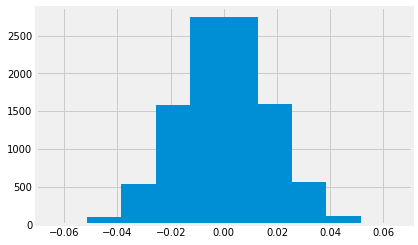

In [68]:
# Code to plot a histogram of p_differences
plt.hist(p_differences)

Based on the evidence above, how likely is it that, in the long run, "White
British" people have the same chance of arrest after they are stopped and
searched as do not-White British people?

Assign either 1, 2, 3, 4, or 5 to the name `likely_outcome_same` below.

1. Reasonably likely.
2. Fairly unlikely, but not unlikely enough to be surprising.
3. Unlikely, but we still cannot be confident the model is incorrect.
4. Highly unlikely, we have strong evidence the model is incorrect.
5. The observed result is impossible given the model assuming no difference.

In [69]:
#- 3 marks / 100 (total 100 so far)
likely_outcome_same = 2

The next cell checks that your answer above is in the correct format. This
test *does not* check that you answered correctly; only that you assigned a
number successfully in the multiple-choice answer cell.

In [70]:
_ = ok.grade('q_24_outcome_same')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



## Done.

Congratulations, you're done with the assignment!  Be sure to:

- **run all the tests** (the next cell has a shortcut for that),
- **Save and Checkpoint** from the `File` menu,

**Remember - the tests only test that your answers are compatible with the
right answer.  For example, they may test whether your answer is in the right
format.  They do not test whether your answer is correct**.

In [71]:
# For your convenience, you can run this cell to run all the tests at once!
import os
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 5
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------